In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib
from math import sin, pi,exp

(25, 180, 167)


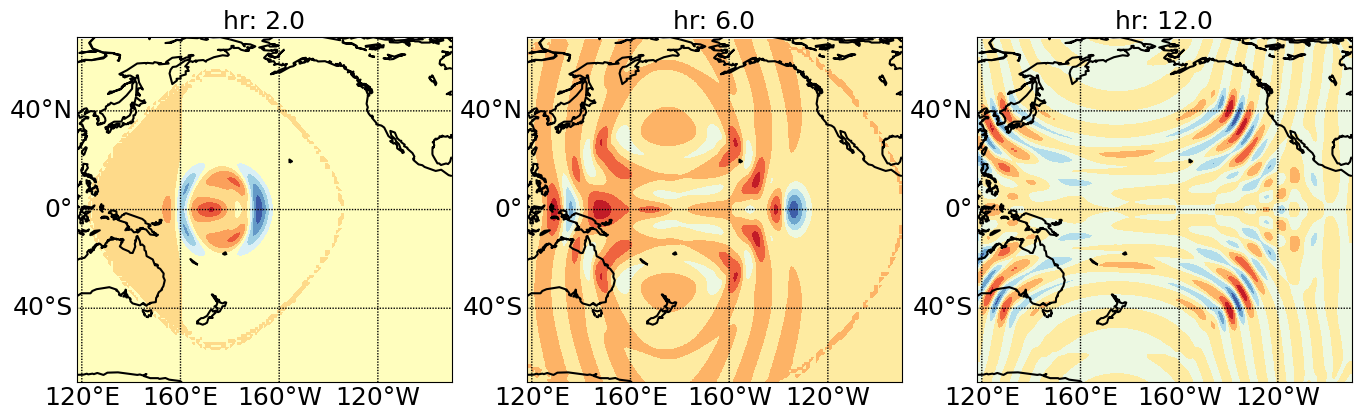

In [5]:
u_eq = np.fromfile('zonal_velocity.bin', dtype=np.float64)
u_eq = u_eq.reshape((25, 180, 167))
print(u_eq.shape)

ny = 180
nx = 167

lat = np.linspace(-90,90,num = ny)
lon = np.linspace(118,270,num = nx)

# Plot the zonal velocity anomaly
p_d = [4, 12, 24]
star_lon = 118
cut_off_lon = 270 # 285

fig = plt.figure(figsize=(15,90))
gs1 = gridspec.GridSpec(1,3,wspace=0.2, hspace=0.2, top=0.12, bottom=0.01, left=0.1, right=0.95)
i = 0

for py in p_d:
    ax = plt.subplot(gs1[i])
    plt.axis('on')
    ax.set_title('hr: {0}'.format((py)*0.5),fontsize=18)
    map = Basemap(projection='cyl',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=star_lon,urcrnrlon=cut_off_lon)
    map.drawcoastlines(linewidth=1.5)
    parallels = np.arange(-80,80,40)
    meridians = np.arange(120,280,40)
    lons,lats = np.meshgrid(lon,lat[20:159])
    xx,yy = map(lons,lats)
    map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
    map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
    cmap = plt.get_cmap('RdYlBu_r')
    vmap = map.contourf(xx,yy,u_eq[py,20:159,:],cmap = cmap)
    i = i + 1
 

plt.show()